In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from mlxtend.plotting import plot_decision_regions

# Creating Data

In [14]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [15]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

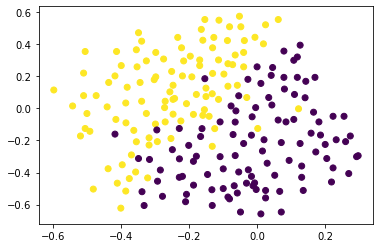

In [16]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Classification without Dropout Layers

In [17]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 34ms/step - loss: 0.5706 - accuracy: 0.7619 - val_loss: 0.6032 - val_accuracy: 0.6047
Epoch 2/500
6/6 [==============================] - 0s 15ms/step - loss: 0.3084 - accuracy: 0.8810 - val_loss: 0.6364 - val_accuracy: 0.6744
Epoch 3/500
6/6 [==============================] - 0s 20ms/step - loss: 0.2381 - accuracy: 0.8869 - val_loss: 0.3494 - val_accuracy: 0.8605
Epoch 4/500
6/6 [==============================] - 0s 20ms/step - loss: 0.2141 - accuracy: 0.9345 - val_loss: 0.2952 - val_accuracy: 0.8837
Epoch 5/500
6/6 [==============================] - 0s 21ms/step - loss: 0.2405 - accuracy: 0.9167 - val_loss: 0.3263 - val_accuracy: 0.8605
Epoch 6/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2124 - accuracy: 0.9226 - val_loss: 0.4386 - val_accuracy: 0.8140
Epoch 7/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2430 - accuracy: 0.9167 - val_loss: 0.5465 - val_accuracy: 0.7442
Epoch 8/500
6/6 [===

6/6 [==============================] - 0s 19ms/step - loss: 0.1508 - accuracy: 0.9286 - val_loss: 0.4061 - val_accuracy: 0.8837
Epoch 60/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1419 - accuracy: 0.9286 - val_loss: 0.3855 - val_accuracy: 0.9070
Epoch 61/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1366 - accuracy: 0.9583 - val_loss: 0.4289 - val_accuracy: 0.8605
Epoch 62/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1264 - accuracy: 0.9464 - val_loss: 0.4857 - val_accuracy: 0.8372
Epoch 63/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1285 - accuracy: 0.9464 - val_loss: 0.5352 - val_accuracy: 0.8372
Epoch 64/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1345 - accuracy: 0.9405 - val_loss: 0.4050 - val_accuracy: 0.9302
Epoch 65/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1264 - accuracy: 0.9464 - val_loss: 0.4876 - val_accuracy: 0.8837
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 20ms/step - loss: 0.0944 - accuracy: 0.9583 - val_loss: 0.7746 - val_accuracy: 0.8605
Epoch 118/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0917 - accuracy: 0.9583 - val_loss: 0.8339 - val_accuracy: 0.8372
Epoch 119/500
6/6 [==============================] - 0s 24ms/step - loss: 0.0903 - accuracy: 0.9583 - val_loss: 0.8569 - val_accuracy: 0.8140
Epoch 120/500
6/6 [==============================] - 0s 20ms/step - loss: 0.0934 - accuracy: 0.9643 - val_loss: 0.8000 - val_accuracy: 0.8140
Epoch 121/500
6/6 [==============================] - 0s 20ms/step - loss: 0.0918 - accuracy: 0.9583 - val_loss: 0.8214 - val_accuracy: 0.8140
Epoch 122/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0920 - accuracy: 0.9583 - val_loss: 0.7969 - val_accuracy: 0.8372
Epoch 123/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0962 - accuracy: 0.9524 - val_loss: 0.5692 - val_accuracy: 0.9070
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 10ms/step - loss: 0.0705 - accuracy: 0.9702 - val_loss: 0.8527 - val_accuracy: 0.8372
Epoch 176/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0816 - accuracy: 0.9583 - val_loss: 0.8828 - val_accuracy: 0.8605
Epoch 177/500
6/6 [==============================] - 0s 26ms/step - loss: 0.0790 - accuracy: 0.9643 - val_loss: 0.8387 - val_accuracy: 0.8605
Epoch 178/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0728 - accuracy: 0.9702 - val_loss: 0.9827 - val_accuracy: 0.8372
Epoch 179/500
6/6 [==============================] - 0s 32ms/step - loss: 0.0896 - accuracy: 0.9643 - val_loss: 0.9494 - val_accuracy: 0.8140
Epoch 180/500
6/6 [==============================] - 0s 32ms/step - loss: 0.1129 - accuracy: 0.9643 - val_loss: 0.8337 - val_accuracy: 0.8837
Epoch 181/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1002 - accuracy: 0.9524 - val_loss: 1.1865 - val_accuracy: 0.7907
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0481 - accuracy: 0.9762 - val_loss: 1.3800 - val_accuracy: 0.7674
Epoch 234/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0463 - accuracy: 0.9881 - val_loss: 1.3373 - val_accuracy: 0.8140
Epoch 235/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0453 - accuracy: 0.9821 - val_loss: 1.2829 - val_accuracy: 0.8140
Epoch 236/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0446 - accuracy: 0.9821 - val_loss: 1.3120 - val_accuracy: 0.8140
Epoch 237/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0446 - accuracy: 0.9821 - val_loss: 1.3411 - val_accuracy: 0.8140
Epoch 238/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0422 - accuracy: 0.9821 - val_loss: 1.3375 - val_accuracy: 0.8140
Epoch 239/500
6/6 [==============================] - 0s 24ms/step - loss: 0.0409 - accuracy: 0.9881 - val_loss: 1.3630 - val_accuracy: 0.8140
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0315 - accuracy: 0.9881 - val_loss: 1.7311 - val_accuracy: 0.8140
Epoch 292/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.9881 - val_loss: 1.6674 - val_accuracy: 0.8140
Epoch 293/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0294 - accuracy: 0.9881 - val_loss: 1.5817 - val_accuracy: 0.8140
Epoch 294/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0275 - accuracy: 0.9940 - val_loss: 1.5131 - val_accuracy: 0.8372
Epoch 295/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0348 - accuracy: 0.9821 - val_loss: 1.5321 - val_accuracy: 0.8140
Epoch 296/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0343 - accuracy: 0.9821 - val_loss: 1.6448 - val_accuracy: 0.8140
Epoch 297/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0301 - accuracy: 0.9881 - val_loss: 1.3852 - val_accuracy: 0.8372
Epoch 

Epoch 349/500
6/6 [==============================] - 0s 28ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 1.7493 - val_accuracy: 0.8372
Epoch 350/500
6/6 [==============================] - 0s 26ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 1.8598 - val_accuracy: 0.8140
Epoch 351/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0170 - accuracy: 0.9881 - val_loss: 2.0741 - val_accuracy: 0.8140
Epoch 352/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 1.8374 - val_accuracy: 0.8372
Epoch 353/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0236 - accuracy: 0.9940 - val_loss: 1.7371 - val_accuracy: 0.8140
Epoch 354/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.9237 - val_accuracy: 0.8140
Epoch 355/500
6/6 [==============================] - 0s 16ms/step - loss: 0.0254 - accuracy: 0.9821 - val_loss: 1.5239 - val_accuracy: 0.8372
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 27ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 1.7586 - val_accuracy: 0.8372
Epoch 408/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0152 - accuracy: 0.9940 - val_loss: 1.7714 - val_accuracy: 0.8372
Epoch 409/500
6/6 [==============================] - 0s 18ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 1.7690 - val_accuracy: 0.8372
Epoch 410/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 1.7384 - val_accuracy: 0.8372
Epoch 411/500
6/6 [==============================] - 0s 14ms/step - loss: 0.0184 - accuracy: 0.9881 - val_loss: 1.7735 - val_accuracy: 0.8372
Epoch 412/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 1.9028 - val_accuracy: 0.8140
Epoch 413/500
6/6 [==============================] - 0s 29ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 1.9419 - val_accuracy: 0.8140
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0552 - accuracy: 0.9762 - val_loss: 1.8760 - val_accuracy: 0.7907
Epoch 466/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0341 - accuracy: 0.9940 - val_loss: 1.5734 - val_accuracy: 0.8140
Epoch 467/500
6/6 [==============================] - 0s 22ms/step - loss: 0.0469 - accuracy: 0.9881 - val_loss: 1.5915 - val_accuracy: 0.7907
Epoch 468/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0309 - accuracy: 0.9940 - val_loss: 1.6357 - val_accuracy: 0.7907
Epoch 469/500
6/6 [==============================] - 0s 20ms/step - loss: 0.0330 - accuracy: 0.9881 - val_loss: 1.7172 - val_accuracy: 0.7907
Epoch 470/500
6/6 [==============================] - 0s 20ms/step - loss: 0.0294 - accuracy: 0.9940 - val_loss: 1.7767 - val_accuracy: 0.7907
Epoch 471/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0283 - accuracy: 0.9940 - val_loss: 1.7055 - val_accuracy: 0.7674
Epoch 

3888/3888 [==============================] - 11s 3ms/step


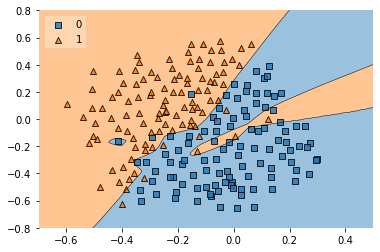

In [18]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

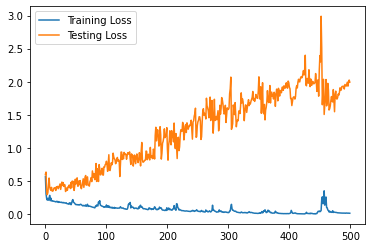

In [19]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend()
plt.show()

# Classification with Dropout Layers

### p= 0.3
- overfitting not reduced to that extend 

In [20]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 67ms/step - loss: 0.5684 - accuracy: 0.7738 - val_loss: 0.6842 - val_accuracy: 0.5814
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3125 - accuracy: 0.8631 - val_loss: 0.7038 - val_accuracy: 0.6977
Epoch 3/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3149 - accuracy: 0.8690 - val_loss: 0.6341 - val_accuracy: 0.7674
Epoch 4/500
6/6 [==============================] - 0s 14ms/step - loss: 0.3114 - accuracy: 0.8929 - val_loss: 0.3870 - val_accuracy: 0.8372
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2618 - accuracy: 0.9048 - val_loss: 0.3529 - val_accuracy: 0.8605
Epoch 6/500
6/6 [==============================] - 0s 16ms/step - loss: 0.2313 - accuracy: 0.9048 - val_loss: 0.4703 - val_accuracy: 0.7907
Epoch 7/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2220 - accuracy: 0.9345 - val_loss: 0.4270 - val_accuracy: 0.8140
Epoch 8/500
6/6 [===

6/6 [==============================] - 0s 17ms/step - loss: 0.1892 - accuracy: 0.9345 - val_loss: 0.4696 - val_accuracy: 0.8372
Epoch 60/500
6/6 [==============================] - 0s 18ms/step - loss: 0.1780 - accuracy: 0.9226 - val_loss: 0.4392 - val_accuracy: 0.8605
Epoch 61/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1742 - accuracy: 0.9345 - val_loss: 0.4150 - val_accuracy: 0.8605
Epoch 62/500
6/6 [==============================] - 0s 24ms/step - loss: 0.1814 - accuracy: 0.9345 - val_loss: 0.4814 - val_accuracy: 0.8605
Epoch 63/500
6/6 [==============================] - 0s 29ms/step - loss: 0.1730 - accuracy: 0.9405 - val_loss: 0.4661 - val_accuracy: 0.8605
Epoch 64/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1618 - accuracy: 0.9345 - val_loss: 0.4320 - val_accuracy: 0.8605
Epoch 65/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1690 - accuracy: 0.9405 - val_loss: 0.4485 - val_accuracy: 0.8605
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 17ms/step - loss: 0.1368 - accuracy: 0.9524 - val_loss: 0.5024 - val_accuracy: 0.8605
Epoch 118/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1312 - accuracy: 0.9583 - val_loss: 0.5410 - val_accuracy: 0.8605
Epoch 119/500
6/6 [==============================] - 0s 35ms/step - loss: 0.1601 - accuracy: 0.9464 - val_loss: 0.5888 - val_accuracy: 0.8605
Epoch 120/500
6/6 [==============================] - 0s 25ms/step - loss: 0.1383 - accuracy: 0.9405 - val_loss: 0.6104 - val_accuracy: 0.8605
Epoch 121/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1628 - accuracy: 0.9464 - val_loss: 0.5291 - val_accuracy: 0.8605
Epoch 122/500
6/6 [==============================] - 0s 18ms/step - loss: 0.1368 - accuracy: 0.9464 - val_loss: 0.5561 - val_accuracy: 0.8605
Epoch 123/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1480 - accuracy: 0.9464 - val_loss: 0.5773 - val_accuracy: 0.8372
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1330 - accuracy: 0.9464 - val_loss: 0.5237 - val_accuracy: 0.8605
Epoch 176/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1512 - accuracy: 0.9405 - val_loss: 0.6365 - val_accuracy: 0.8605
Epoch 177/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1396 - accuracy: 0.9405 - val_loss: 0.8511 - val_accuracy: 0.8140
Epoch 178/500
6/6 [==============================] - 0s 18ms/step - loss: 0.1782 - accuracy: 0.9345 - val_loss: 0.6158 - val_accuracy: 0.8605
Epoch 179/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1175 - accuracy: 0.9524 - val_loss: 0.4966 - val_accuracy: 0.9070
Epoch 180/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1801 - accuracy: 0.9286 - val_loss: 0.6589 - val_accuracy: 0.8372
Epoch 181/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1449 - accuracy: 0.9464 - val_loss: 0.7587 - val_accuracy: 0.8372
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1119 - accuracy: 0.9464 - val_loss: 0.5980 - val_accuracy: 0.8837
Epoch 234/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1460 - accuracy: 0.9405 - val_loss: 0.5985 - val_accuracy: 0.8837
Epoch 235/500
6/6 [==============================] - 0s 40ms/step - loss: 0.1535 - accuracy: 0.9345 - val_loss: 0.6931 - val_accuracy: 0.8372
Epoch 236/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1052 - accuracy: 0.9583 - val_loss: 0.7486 - val_accuracy: 0.8372
Epoch 237/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1335 - accuracy: 0.9286 - val_loss: 0.7101 - val_accuracy: 0.8605
Epoch 238/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1247 - accuracy: 0.9524 - val_loss: 0.6983 - val_accuracy: 0.8605
Epoch 239/500
6/6 [==============================] - 0s 36ms/step - loss: 0.1672 - accuracy: 0.9226 - val_loss: 0.7818 - val_accuracy: 0.8140
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1231 - accuracy: 0.9345 - val_loss: 1.1977 - val_accuracy: 0.8372
Epoch 292/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1061 - accuracy: 0.9464 - val_loss: 0.9383 - val_accuracy: 0.8372
Epoch 293/500
6/6 [==============================] - 0s 40ms/step - loss: 0.1066 - accuracy: 0.9405 - val_loss: 0.7484 - val_accuracy: 0.8372
Epoch 294/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1645 - accuracy: 0.9345 - val_loss: 0.8149 - val_accuracy: 0.8140
Epoch 295/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1156 - accuracy: 0.9464 - val_loss: 1.0072 - val_accuracy: 0.7907
Epoch 296/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1347 - accuracy: 0.9345 - val_loss: 0.9158 - val_accuracy: 0.8372
Epoch 297/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1078 - accuracy: 0.9464 - val_loss: 0.9534 - val_accuracy: 0.8605
Epoch 

Epoch 349/500
6/6 [==============================] - 0s 19ms/step - loss: 0.0933 - accuracy: 0.9583 - val_loss: 1.0770 - val_accuracy: 0.8372
Epoch 350/500
6/6 [==============================] - 0s 17ms/step - loss: 0.0991 - accuracy: 0.9583 - val_loss: 1.1304 - val_accuracy: 0.8372
Epoch 351/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1057 - accuracy: 0.9583 - val_loss: 1.1220 - val_accuracy: 0.8372
Epoch 352/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1283 - accuracy: 0.9583 - val_loss: 1.2203 - val_accuracy: 0.8372
Epoch 353/500
6/6 [==============================] - 0s 18ms/step - loss: 0.1038 - accuracy: 0.9583 - val_loss: 0.8917 - val_accuracy: 0.8605
Epoch 354/500
6/6 [==============================] - 0s 21ms/step - loss: 0.0990 - accuracy: 0.9464 - val_loss: 0.9488 - val_accuracy: 0.8605
Epoch 355/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1148 - accuracy: 0.9524 - val_loss: 1.2043 - val_accuracy: 0.8140
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1213 - accuracy: 0.9345 - val_loss: 0.6731 - val_accuracy: 0.9070
Epoch 408/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1129 - accuracy: 0.9464 - val_loss: 0.7328 - val_accuracy: 0.8837
Epoch 409/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1202 - accuracy: 0.9643 - val_loss: 0.8338 - val_accuracy: 0.8372
Epoch 410/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1293 - accuracy: 0.9405 - val_loss: 0.9756 - val_accuracy: 0.8372
Epoch 411/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1067 - accuracy: 0.9643 - val_loss: 0.8907 - val_accuracy: 0.8605
Epoch 412/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1113 - accuracy: 0.9524 - val_loss: 0.8828 - val_accuracy: 0.8372
Epoch 413/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1391 - accuracy: 0.9464 - val_loss: 0.9496 - val_accuracy: 0.8372
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1294 - accuracy: 0.9583 - val_loss: 1.1755 - val_accuracy: 0.8372
Epoch 466/500
6/6 [==============================] - 0s 24ms/step - loss: 0.0787 - accuracy: 0.9583 - val_loss: 1.0837 - val_accuracy: 0.8372
Epoch 467/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1165 - accuracy: 0.9464 - val_loss: 0.9455 - val_accuracy: 0.8605
Epoch 468/500
6/6 [==============================] - 0s 24ms/step - loss: 0.0857 - accuracy: 0.9643 - val_loss: 0.9469 - val_accuracy: 0.8605
Epoch 469/500
6/6 [==============================] - 0s 24ms/step - loss: 0.1200 - accuracy: 0.9583 - val_loss: 0.9486 - val_accuracy: 0.8605
Epoch 470/500
6/6 [==============================] - 0s 23ms/step - loss: 0.0897 - accuracy: 0.9702 - val_loss: 0.9217 - val_accuracy: 0.8372
Epoch 471/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1223 - accuracy: 0.9345 - val_loss: 0.7999 - val_accuracy: 0.8605
Epoch 

3888/3888 [==============================] - 12s 3ms/step


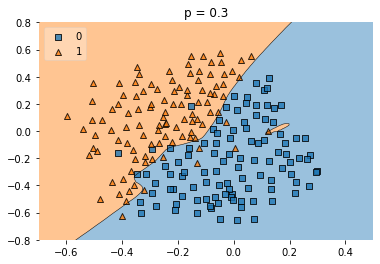

In [21]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.3')
plt.show()

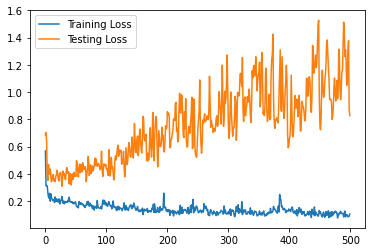

In [22]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend()
plt.show()

### p= 0.6
- overfitting reduced, smooth decision boundary 
- nearn to optimal fit 
- high value of p helps to reduce overfitting 

In [23]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 37ms/step - loss: 0.6080 - accuracy: 0.8214 - val_loss: 0.6245 - val_accuracy: 0.5814
Epoch 2/500
6/6 [==============================] - 0s 17ms/step - loss: 0.3713 - accuracy: 0.8452 - val_loss: 0.7369 - val_accuracy: 0.6279
Epoch 3/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2707 - accuracy: 0.8929 - val_loss: 0.6690 - val_accuracy: 0.6744
Epoch 4/500
6/6 [==============================] - 0s 24ms/step - loss: 0.2915 - accuracy: 0.8810 - val_loss: 0.4551 - val_accuracy: 0.7674
Epoch 5/500
6/6 [==============================] - 0s 25ms/step - loss: 0.2708 - accuracy: 0.8929 - val_loss: 0.4200 - val_accuracy: 0.7907
Epoch 6/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2862 - accuracy: 0.8929 - val_loss: 0.4076 - val_accuracy: 0.8140
Epoch 7/500
6/6 [==============================] - 0s 23ms/step - loss: 0.2752 - accuracy: 0.8810 - val_loss: 0.4385 - val_accuracy: 0.7907
Epoch 8/500
6/6 [===

6/6 [==============================] - 0s 12ms/step - loss: 0.2000 - accuracy: 0.9226 - val_loss: 0.4681 - val_accuracy: 0.8605
Epoch 60/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2266 - accuracy: 0.9048 - val_loss: 0.3908 - val_accuracy: 0.8605
Epoch 61/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2255 - accuracy: 0.9226 - val_loss: 0.3637 - val_accuracy: 0.8605
Epoch 62/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2357 - accuracy: 0.9167 - val_loss: 0.3450 - val_accuracy: 0.8605
Epoch 63/500
6/6 [==============================] - 0s 20ms/step - loss: 0.2228 - accuracy: 0.9048 - val_loss: 0.3394 - val_accuracy: 0.8605
Epoch 64/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2214 - accuracy: 0.8869 - val_loss: 0.3365 - val_accuracy: 0.8605
Epoch 65/500
6/6 [==============================] - 0s 20ms/step - loss: 0.2058 - accuracy: 0.9405 - val_loss: 0.3719 - val_accuracy: 0.8605
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 20ms/step - loss: 0.1927 - accuracy: 0.9167 - val_loss: 0.4721 - val_accuracy: 0.8605
Epoch 118/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1989 - accuracy: 0.9226 - val_loss: 0.3861 - val_accuracy: 0.8605
Epoch 119/500
6/6 [==============================] - 0s 27ms/step - loss: 0.1930 - accuracy: 0.9107 - val_loss: 0.4123 - val_accuracy: 0.8605
Epoch 120/500
6/6 [==============================] - 0s 19ms/step - loss: 0.2025 - accuracy: 0.9048 - val_loss: 0.4041 - val_accuracy: 0.8605
Epoch 121/500
6/6 [==============================] - 0s 20ms/step - loss: 0.2015 - accuracy: 0.9286 - val_loss: 0.4303 - val_accuracy: 0.8605
Epoch 122/500
6/6 [==============================] - 0s 18ms/step - loss: 0.2171 - accuracy: 0.9107 - val_loss: 0.4390 - val_accuracy: 0.8605
Epoch 123/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1943 - accuracy: 0.9167 - val_loss: 0.4284 - val_accuracy: 0.8605
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 25ms/step - loss: 0.1953 - accuracy: 0.9226 - val_loss: 0.4127 - val_accuracy: 0.8837
Epoch 176/500
6/6 [==============================] - 0s 20ms/step - loss: 0.2220 - accuracy: 0.9048 - val_loss: 0.4803 - val_accuracy: 0.8605
Epoch 177/500
6/6 [==============================] - 0s 19ms/step - loss: 0.2042 - accuracy: 0.8869 - val_loss: 0.5234 - val_accuracy: 0.8605
Epoch 178/500
6/6 [==============================] - 0s 16ms/step - loss: 0.2004 - accuracy: 0.9464 - val_loss: 0.4477 - val_accuracy: 0.8605
Epoch 179/500
6/6 [==============================] - 0s 16ms/step - loss: 0.2021 - accuracy: 0.9048 - val_loss: 0.4329 - val_accuracy: 0.8605
Epoch 180/500
6/6 [==============================] - 0s 11ms/step - loss: 0.2155 - accuracy: 0.9286 - val_loss: 0.4687 - val_accuracy: 0.8605
Epoch 181/500
6/6 [==============================] - 0s 10ms/step - loss: 0.1800 - accuracy: 0.9345 - val_loss: 0.5038 - val_accuracy: 0.8605
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1625 - accuracy: 0.9226 - val_loss: 0.5593 - val_accuracy: 0.8605
Epoch 234/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1879 - accuracy: 0.9286 - val_loss: 0.6145 - val_accuracy: 0.8605
Epoch 235/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1906 - accuracy: 0.9226 - val_loss: 0.7072 - val_accuracy: 0.8605
Epoch 236/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1907 - accuracy: 0.9286 - val_loss: 0.7980 - val_accuracy: 0.8605
Epoch 237/500
6/6 [==============================] - 0s 15ms/step - loss: 0.2389 - accuracy: 0.9107 - val_loss: 0.5764 - val_accuracy: 0.8605
Epoch 238/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1682 - accuracy: 0.9286 - val_loss: 0.4970 - val_accuracy: 0.8605
Epoch 239/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1972 - accuracy: 0.9107 - val_loss: 0.4994 - val_accuracy: 0.8605
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1681 - accuracy: 0.9405 - val_loss: 0.4530 - val_accuracy: 0.8605
Epoch 292/500
6/6 [==============================] - 0s 16ms/step - loss: 0.2190 - accuracy: 0.9107 - val_loss: 0.4650 - val_accuracy: 0.8605
Epoch 293/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1798 - accuracy: 0.9048 - val_loss: 0.4676 - val_accuracy: 0.8837
Epoch 294/500
6/6 [==============================] - 0s 18ms/step - loss: 0.1749 - accuracy: 0.9107 - val_loss: 0.5452 - val_accuracy: 0.8605
Epoch 295/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1998 - accuracy: 0.9286 - val_loss: 0.5525 - val_accuracy: 0.8605
Epoch 296/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1813 - accuracy: 0.9524 - val_loss: 0.4971 - val_accuracy: 0.8605
Epoch 297/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2130 - accuracy: 0.9048 - val_loss: 0.4494 - val_accuracy: 0.8605
Epoch 

Epoch 349/500
6/6 [==============================] - 0s 24ms/step - loss: 0.1721 - accuracy: 0.9226 - val_loss: 0.6637 - val_accuracy: 0.8605
Epoch 350/500
6/6 [==============================] - 0s 22ms/step - loss: 0.1578 - accuracy: 0.9405 - val_loss: 0.5665 - val_accuracy: 0.8837
Epoch 351/500
6/6 [==============================] - 0s 24ms/step - loss: 0.2011 - accuracy: 0.9286 - val_loss: 0.6208 - val_accuracy: 0.8605
Epoch 352/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1952 - accuracy: 0.9226 - val_loss: 0.7259 - val_accuracy: 0.8605
Epoch 353/500
6/6 [==============================] - 0s 18ms/step - loss: 0.1728 - accuracy: 0.9226 - val_loss: 0.7607 - val_accuracy: 0.8605
Epoch 354/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1652 - accuracy: 0.9286 - val_loss: 0.7747 - val_accuracy: 0.8605
Epoch 355/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1927 - accuracy: 0.9167 - val_loss: 0.7795 - val_accuracy: 0.8605
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 24ms/step - loss: 0.1857 - accuracy: 0.9226 - val_loss: 0.7397 - val_accuracy: 0.8605
Epoch 408/500
6/6 [==============================] - 0s 23ms/step - loss: 0.1910 - accuracy: 0.9107 - val_loss: 0.5857 - val_accuracy: 0.8837
Epoch 409/500
6/6 [==============================] - 0s 22ms/step - loss: 0.2113 - accuracy: 0.9226 - val_loss: 0.4812 - val_accuracy: 0.9070
Epoch 410/500
6/6 [==============================] - 0s 19ms/step - loss: 0.2109 - accuracy: 0.8988 - val_loss: 0.5388 - val_accuracy: 0.9070
Epoch 411/500
6/6 [==============================] - 0s 19ms/step - loss: 0.1809 - accuracy: 0.9107 - val_loss: 0.6560 - val_accuracy: 0.8605
Epoch 412/500
6/6 [==============================] - 0s 21ms/step - loss: 0.1825 - accuracy: 0.9345 - val_loss: 0.6461 - val_accuracy: 0.8605
Epoch 413/500
6/6 [==============================] - 0s 20ms/step - loss: 0.1739 - accuracy: 0.9286 - val_loss: 0.5925 - val_accuracy: 0.8605
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 28ms/step - loss: 0.1419 - accuracy: 0.9464 - val_loss: 0.9026 - val_accuracy: 0.8605
Epoch 466/500
6/6 [==============================] - 0s 28ms/step - loss: 0.2043 - accuracy: 0.9226 - val_loss: 0.9382 - val_accuracy: 0.8605
Epoch 467/500
6/6 [==============================] - 0s 27ms/step - loss: 0.2161 - accuracy: 0.9226 - val_loss: 0.7000 - val_accuracy: 0.8605
Epoch 468/500
6/6 [==============================] - 0s 26ms/step - loss: 0.1867 - accuracy: 0.9464 - val_loss: 0.5738 - val_accuracy: 0.8837
Epoch 469/500
6/6 [==============================] - 0s 31ms/step - loss: 0.1889 - accuracy: 0.9167 - val_loss: 0.5200 - val_accuracy: 0.8837
Epoch 470/500
6/6 [==============================] - 0s 30ms/step - loss: 0.1792 - accuracy: 0.9286 - val_loss: 0.6063 - val_accuracy: 0.8605
Epoch 471/500
6/6 [==============================] - 0s 29ms/step - loss: 0.1675 - accuracy: 0.9405 - val_loss: 0.7310 - val_accuracy: 0.8605
Epoch 

3888/3888 [==============================] - 16s 4ms/step


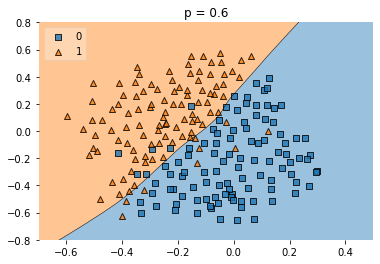

In [24]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.6')
plt.show()

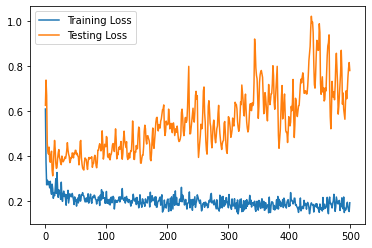

In [25]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.legend()
plt.show()